In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import gudhi
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from Persistent_Homology_Ivanov import PHI

In [2]:
#

In [3]:
data = [[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]]

In [4]:
data1 = [[1, 1, 0], [7, 0, 0], [4, 6, 0], [9, 6, 0], [0, 14, 0], [2, 19, 0], [9, 17, 0]]

In [5]:
compl = PHI(data)
compl.point_cloud()

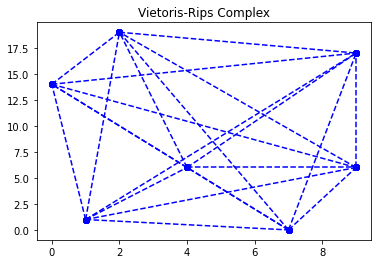

In [6]:
compl.sif(max_dim=2)
for sk_value in compl.simplex_tree.get_skeleton(1):
    if sk_value[1]:
        point1, point2 = data[sk_value[0][0]], data[sk_value[0][1]]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
        plt.title("Vietoris-Rips Complex")

usetex mode requires TeX.


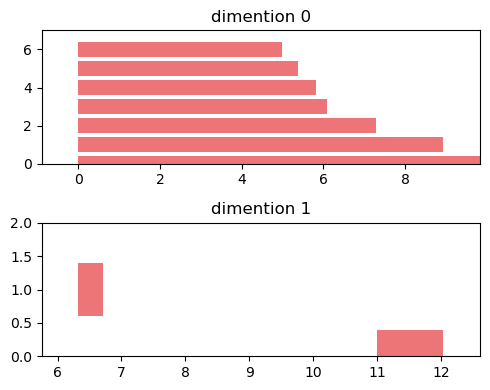

In [7]:
compl.ph_barcode()

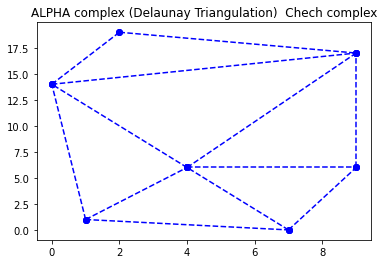

In [8]:
compl.alpha()
for sk_value in compl.simplex_tree.get_skeleton(1):
    if sk_value[1]:
        point1, point2 = data[sk_value[0][0]], data[sk_value[0][1]]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
        plt.title("ALPHA complex (Delaunay Triangulation)  Chech complex")

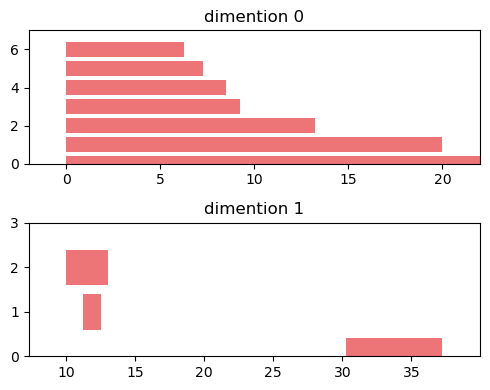

In [9]:
compl.ph_barcode()

In [10]:
dpznm rjkkjrdbevs ary pfgbcb
записи открытые выступления заседания ученого совета
на сайте вышки
выступление лимонченко рук топологии
преза желательно
ссылки на его работы и на работы китайцев которые сделали angular momentum
след неделя как добится оконтуривания дырок
языки
фильтрации
witness filtration 

сайт с буддистской лит-ры
2-5к
википедия
библия
викисурс

SyntaxError: invalid syntax (<ipython-input-10-4db549bd5fc3>, line 1)

In [ ]:
BERT
пост-BERTIAN сети
СВД

In [12]:
from ripser import Rips

In [ ]:
pip install Cython

In [46]:
def find_holes(d_matrix):
    point_cloud= np.array(d_matrix)
    result = ripser(d_matrix, coeff=17, do_cocycles=True, n_perm=7, distance_matrix=True)
    diagrams = result['dgms']
    plot_diagrams(diagrams, show = True)
    cocycles = result['cocycles']
    hole=cocycles[1]
    dgm=[]
    diagrams = result['dgms']
    dgms=diagrams[1]
    dgm.append(dgms)
    for dgm in dgm:
        l = dgm[:, 1] - dgm[:, 0]
    #2. Order the intervals by decreasing length
    index=sorted(range(len(l)), key=lambda k: l[k])
    index=index[::-1]
    l=np.sort(l)
    l=l[::-1]
    #3. Compute the persistent entropy HL
    if all(l > 0):
        L = np.sum(l)
        p = l / L
        Hmax = -np.sum(p * np.log(p))#HL
    #4. Compute the persistent entropy HL'(i)
    #4.1 Compute l’k
    #4.1.1 Compute e^(Hi)
    Hi=[]
    for a in range(len(l)):
        b=0
        temp_Hi=0
        while b<=a:
            temp_Hi=temp_Hi+((-l[b]/L)* np.log(l[b]/L))
            b=b+1
        Hi.append(temp_Hi)
    EHi=[]
    for item in Hi:
        EHi.append(math.exp(item))
    #4.1.2 Compute Si
    lk=[]
    for a in range(len(l)):
        Sum=0
        b=0
        while b<=a:
            Sum=Sum+l[b]
            b=b+1
        lk.append(Sum/EHi[a])#l'k
        H2i=-(lk/L)* np.log(lk/L) #H'i
    #Compute Hrel(i)
    Hrel=[] #Hrel(i)
    feature=[]
    for a in range(len(l)):
        Hrel.append((H2i[a]-H2i[a-1])/(np.log(len(l))-Hmax))
        compare=((a-1)/len(l))
        if Hrel[a]>compare:
            feature.append(1)
        else :
            feature.append(0)
    feature=np.array(feature)
    
    x_hole=[]
    y_hole=[]
    z_hole=[]
    index=np.array(index)
    Find_hole=np.empty((len(feature), 2))
    vertix_all_hole=[]
    for a in range(len(feature)):
        Find_hole[a,0]=feature[a]
        Find_hole[a,1]=index[a]
    hole_feature=[]
    for a in range(len(Find_hole)):
        x_hole_feature=[]
        y_hole_feature=[]
        z_hole_feature=[]
        if Find_hole[a,0]==1:
            position=int(Find_hole[a,1])
            hole_feature.append(position)
            temp=hole[position]
            vertix_hole=[]
            for b in temp:
                for c in b:
                    if all(vertix_hole!=c):
                        vertix_hole.append(c)
                    if all(vertix_all_hole!=c):
                        vertix_all_hole.append(c)
        # vertix_all_hole=Union(vertix_all_hole,vertix_hole)
        for d in range(len(vertix_hole)):
            vertix_index=vertix_hole[d]
            x_hole_feature.append(point_cloud[vertix_index,0])
            y_hole_feature.append(point_cloud[vertix_index,1])
            z_hole_feature.append(point_cloud[vertix_index,2])
    print(index)
    return(x_hole_feature, y_hole_feature, z_hole_feature)

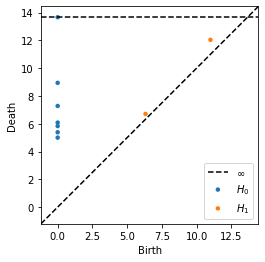

In [14]:
from ripser import ripser
from persim import plot_diagrams
from ripser import Rips
import math
data1 = np.array([[1, 1, 0], [7, 0, 0], [4, 6, 0], [9, 6,0], [0, 14, 0], [2, 19, 0], [9, 17,0]])
result = ripser(data1,coeff=17, do_cocycles=True, n_perm=7)
diagrams = result['dgms']
plot_diagrams(diagrams, show = True)
cocycles = result['cocycles']
hole=cocycles[1]

In [ ]:
PHI1 = PHI(data1)
PHI1.point_cloud()
d_matrix = PHI1.dist_calc(False)[0]
x,y,z = find_holes(d_matrix)

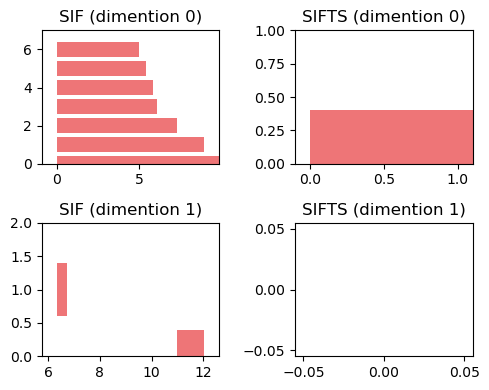

In [16]:
PHI1 = PHI(data1)
PHI1.point_cloud()
PHI1.full_sif_sifts()

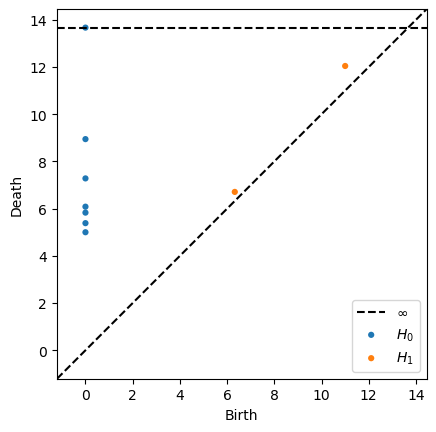

[0 1]


In [47]:
PHI1 = PHI(data1)
PHI1.point_cloud()
d_matrix = PHI1.dist_calc(False)[0]
x,y,z = find_holes(d_matrix)

In [22]:
x,y,z

([9.433981132056603, 6.082762530298219, 5.830951894845301],
 [6.324555320336759, 0.0, 6.708203932499369],
 [5.0, 6.708203932499369, 0.0])

In [26]:
d_matrix

array([[ 0.        ,  6.08276253,  5.83095189,  9.43398113, 13.03840481,
        18.02775638, 17.88854382],
       [ 6.08276253,  0.        ,  6.70820393,  6.32455532, 15.65247584,
        19.6468827 , 17.11724277],
       [ 5.83095189,  6.70820393,  0.        ,  5.        ,  8.94427191,
        13.15294644, 12.08304597],
       [ 9.43398113,  6.32455532,  5.        ,  0.        , 12.04159458,
        14.76482306, 11.        ],
       [13.03840481, 15.65247584,  8.94427191, 12.04159458,  0.        ,
         5.38516481,  9.48683298],
       [18.02775638, 19.6468827 , 13.15294644, 14.76482306,  5.38516481,
         0.        ,  7.28010989],
       [17.88854382, 17.11724277, 12.08304597, 11.        ,  9.48683298,
         7.28010989,  0.        ]])

In [ ]:

compl.sif(max_dim=2)
for sk_value in compl.simplex_tree.get_skeleton(1):
    if sk_value[1]:
        point1, point2 = data[sk_value[0][0]], data[sk_value[0][1]]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
        plt.title("Vietoris-Rips Complex")

In [ ]:
sns.scatterplot(x_hole_feature, y_hole_feature)

In [ ]:
anec = '''Dean, to the physics department. "Why do I always have to give you guys so much money, for laboratories and expensive equipment and stuff. Why couldn't you be like the math department - all they need is money for pencils, paper and waste-paper baskets. Or even better, like the philosophy department. All they need are pencils and paper."Dean, to the physics department. "Why do I always have to give you guys so much money, for laboratories and expensive equipment and stuff. Why couldn't you be like the math department - all they need is money for pencils, paper and waste-paper baskets. Or even better, like the philosophy department. All they need are pencils and paper."'''

new_PHI = PHI(anec)
new_PHI.text_bow_spec(word_count=3)
new_PHI.full_sif_sifts(custom_dist=2)
d_matrix = np.array(new_PHI.bow)

# POINT CLOUD

In [64]:
def find_holes(d_matrix):
    point_cloud= np.array(d_matrix)
    result = ripser(d_matrix, coeff=17, do_cocycles=True, n_perm=7, distance_matrix=False)
    diagrams = result['dgms']
    plot_diagrams(diagrams, show = True)
    cocycles = result['cocycles']
    hole=cocycles[1]
    dgm=[]
    diagrams = result['dgms']
    dgms=diagrams[1]
    dgm.append(dgms)
    for dgm in dgm:
        l = dgm[:, 1] - dgm[:, 0]
    #2. Order the intervals by decreasing length
    index=sorted(range(len(l)), key=lambda k: l[k])
    index=index[::-1]
    l=np.sort(l)
    l=l[::-1]
    #3. Compute the persistent entropy HL
    if all(l > 0):
        L = np.sum(l)
        p = l / L
        Hmax = -np.sum(p * np.log(p))#HL
    #4. Compute the persistent entropy HL'(i)
    #4.1 Compute l’k
    #4.1.1 Compute e^(Hi)
    Hi=[]
    for a in range(len(l)):
        b=0
        temp_Hi=0
        while b<=a:
            temp_Hi=temp_Hi+((-l[b]/L)* np.log(l[b]/L))
            b=b+1
        Hi.append(temp_Hi)
    EHi=[]
    for item in Hi:
        EHi.append(math.exp(item))
    #4.1.2 Compute Si
    lk=[]
    for a in range(len(l)):
        Sum=0
        b=0
        while b<=a:
            Sum=Sum+l[b]
            b=b+1
        lk.append(Sum/EHi[a])#l'k
        H2i=-(lk/L)* np.log(lk/L) #H'i
    #Compute Hrel(i)
    Hrel=[] #Hrel(i)
    feature=[]
    for a in range(len(l)):
        Hrel.append((H2i[a]-H2i[a-1])/(np.log(len(l))-Hmax))
        compare=((a-1)/len(l))
        if Hrel[a]>compare:
            feature.append(1)
        else :
            feature.append(0)
    feature=np.array(feature)
    
    x_hole=[]
    y_hole=[]
    z_hole=[]
    index=np.array(index)
    Find_hole=np.empty((len(feature), 2)) # here we will store indexes nd their status
    vertix_all_hole=[]
    for a in range(len(feature)):
        Find_hole[a,0]=feature[a]
        Find_hole[a,1]=index[a]
    hole_feature=[]
    print('find hole', Find_hole)
    
    for a in range(len(Find_hole)):
        x_hole_feature=[]
        y_hole_feature=[]
        z_hole_feature=[]
        if Find_hole[a,0]==1:
            position=int(Find_hole[a,1])
            hole_feature.append(position) # unused???
            temp=hole[position]
            vertix_hole=[]
            
            print('temp', temp)
            for b in temp:
                print('b', b)
                for c in b:
                    print('c', c)
                    if all(vertix_hole!=c):
                        vertix_hole.append(c) # the lamest way to collect all unique points in temp lmao
                    if all(vertix_all_hole!=c):
                        vertix_all_hole.append(c)
                    print(vertix_hole)
                        
                        
        # vertix_all_hole=Union(vertix_all_hole,vertix_hole)
        for d in range(len(vertix_hole)):
            vertix_index=vertix_hole[d]
            x_hole_feature.append(point_cloud[vertix_index,0])
            y_hole_feature.append(point_cloud[vertix_index,1])
            z_hole_feature.append(point_cloud[vertix_index,2])
    print(cocycles[1], feature, index)
    return(x_hole_feature, y_hole_feature, z_hole_feature)

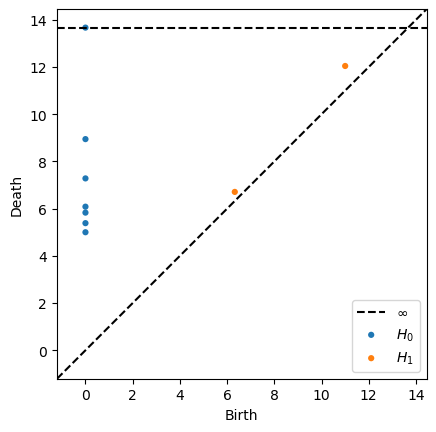

find hole [[1. 0.]
 [1. 1.]]
temp [[6 3 1]
 [4 3 1]]
b [6 3 1]
c 6
[6]
c 3
[6, 3]
c 1
[6, 3, 1]
b [4 3 1]
c 4
[6, 3, 1, 4]
c 3
[6, 3, 1, 4]
c 1
[6, 3, 1, 4]
temp [[3 1 1]
 [2 1 1]]
b [3 1 1]
c 3
[3]
c 1
[3, 1]
c 1
[3, 1]
b [2 1 1]
c 2
[3, 1, 2]
c 1
[3, 1, 2]
c 1
[3, 1, 2]
[array([[6, 3, 1],
       [4, 3, 1]], dtype=int64), array([[3, 1, 1],
       [2, 1, 1]], dtype=int64)] [1 1] [0 1]


In [65]:
x,y,z = find_holes(data1)

In [66]:
np.array([x,y,z]).T

array([[9, 6, 0],
       [7, 0, 0],
       [4, 6, 0]])

In [67]:
data1

array([[ 1,  1,  0],
       [ 7,  0,  0],
       [ 4,  6,  0],
       [ 9,  6,  0],
       [ 0, 14,  0],
       [ 2, 19,  0],
       [ 9, 17,  0]])

In [ ]:
3, 1, 2